### 08-2. 합성곱 신경망을 사용한 이미지 분류 ###

In [66]:
# 데이터 불러오기

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

##### 1) 합성곱 신경망 만들기 #####

In [67]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))

In [68]:
# 풀링층 추가

model.add(keras.layers.MaxPooling2D(2))

In [69]:
# 첫번째 층 다음의 합성곱-풀링 층 추가

model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [70]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)              

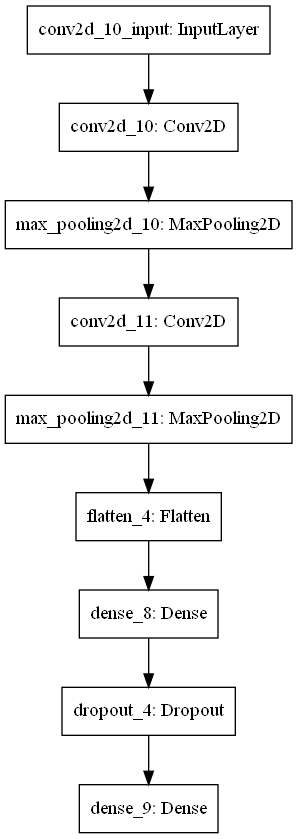

In [72]:
# 구성을 그림으로 표현

keras.utils.plot_model(model)

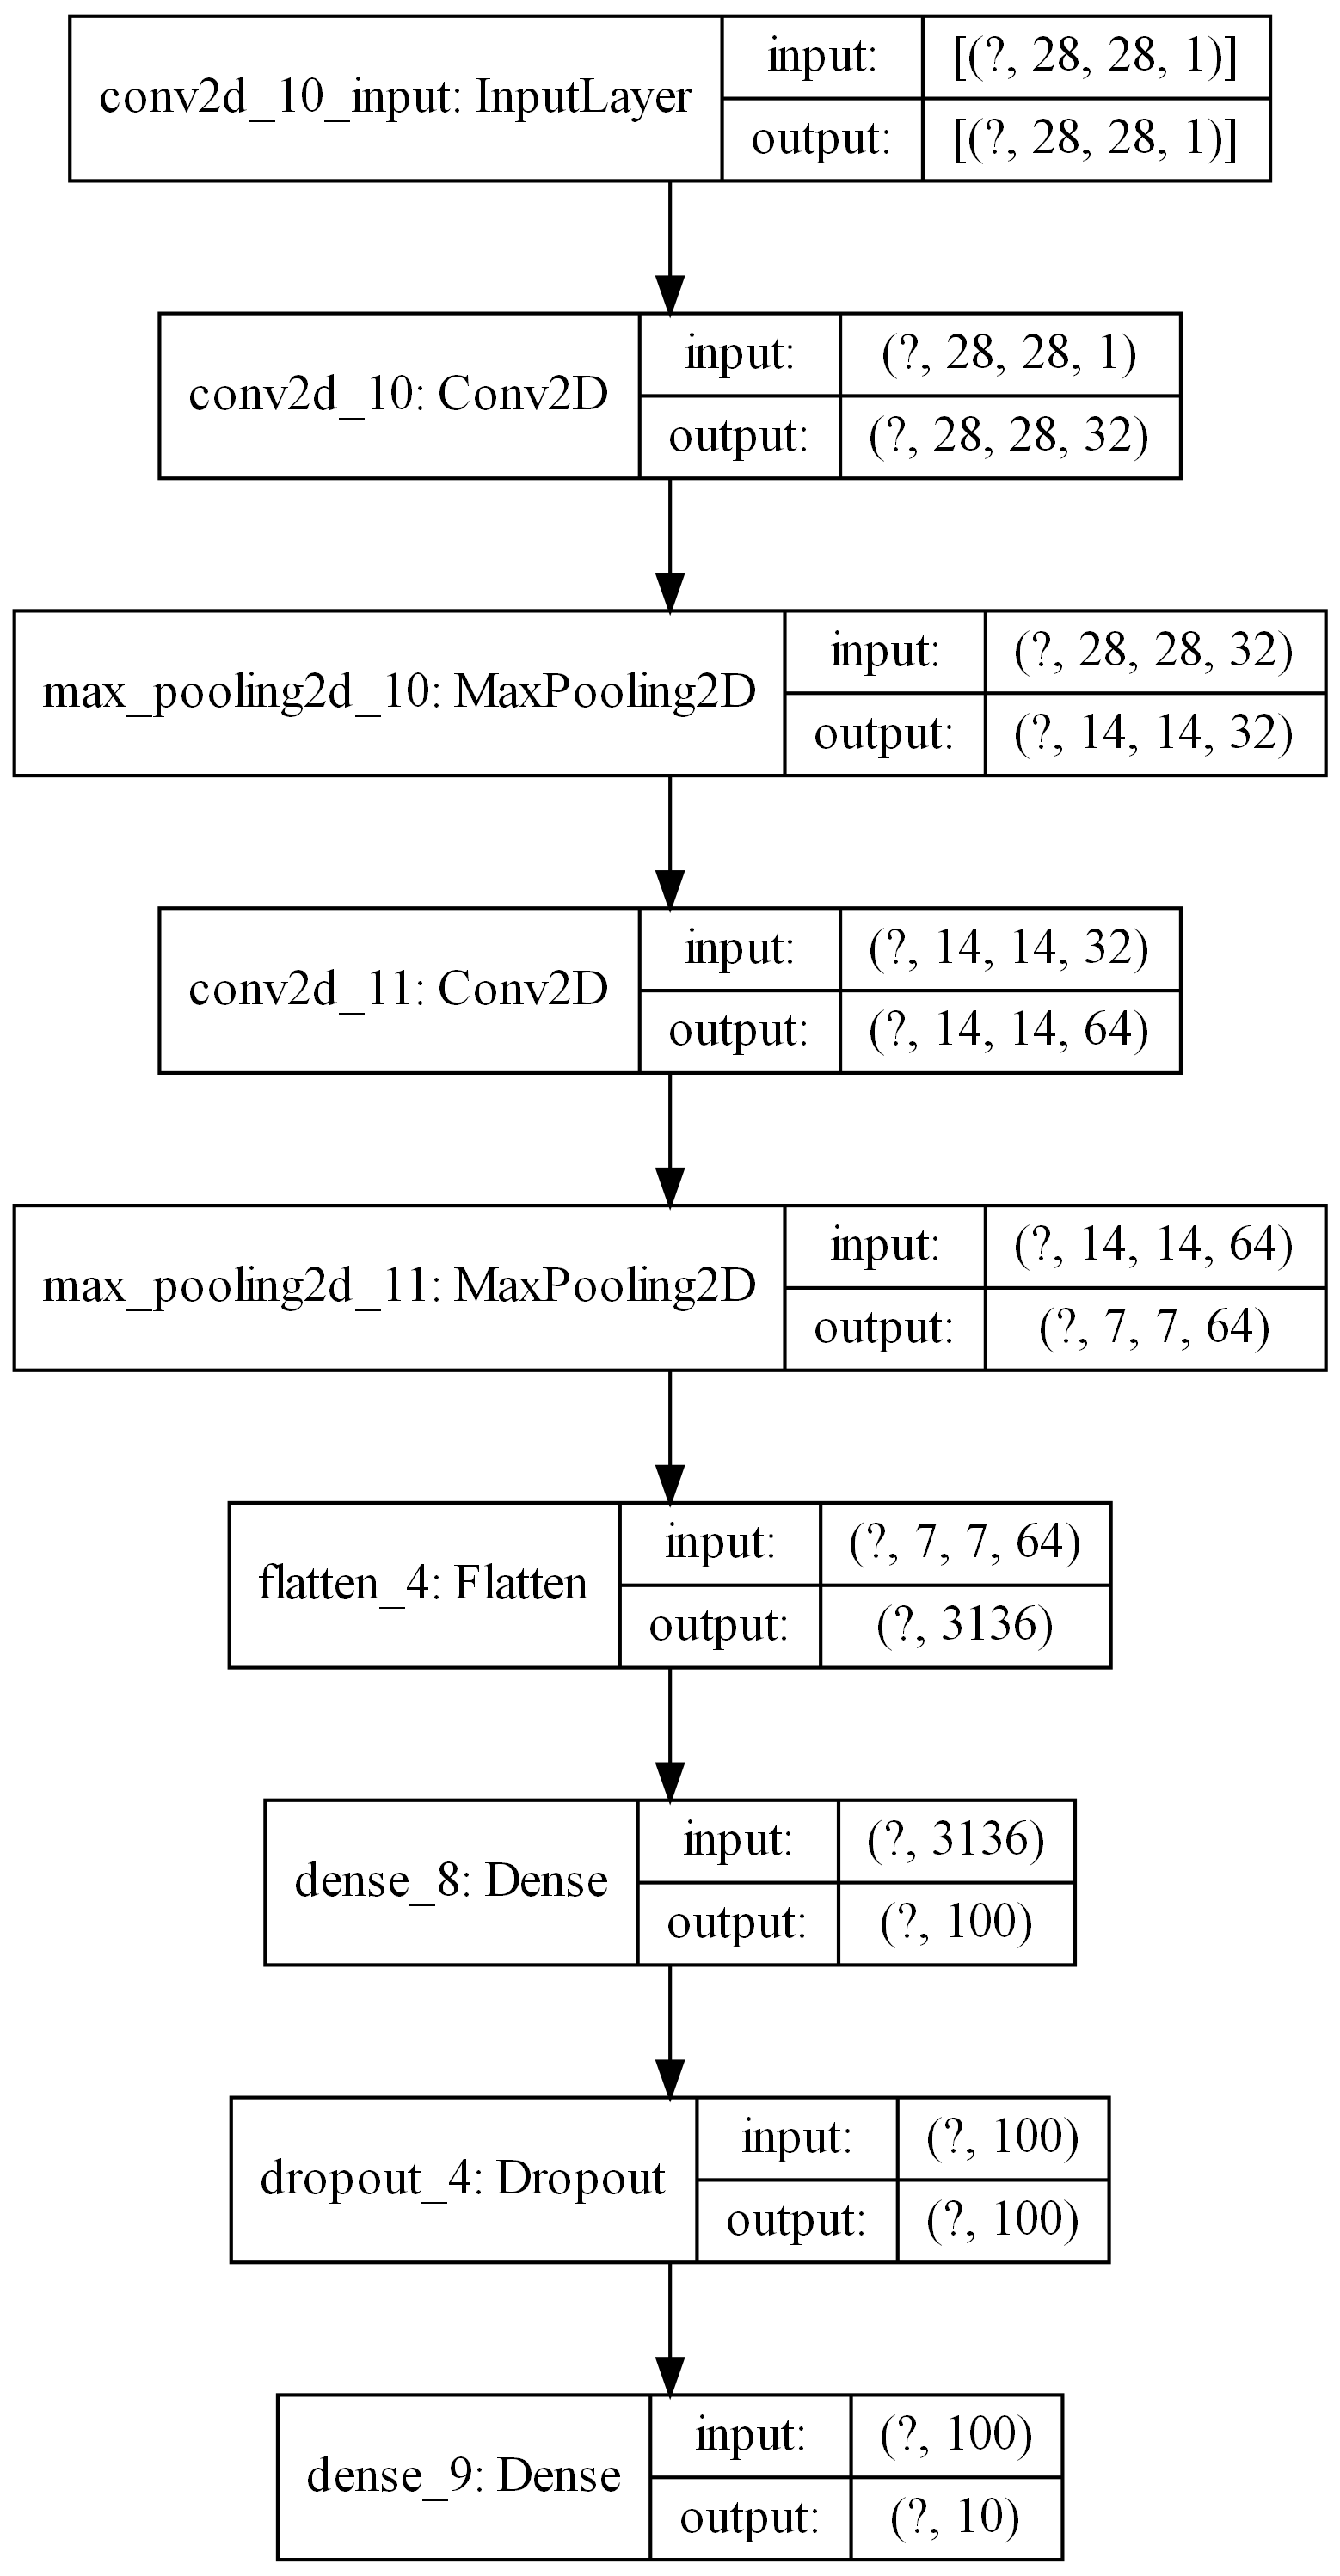

In [73]:
# 입출력 크기를 포함한 그래프

keras.utils.plot_model(model, show_shapes=True, to_file="cnn-architecture.png", dpi=300)

In [75]:
# 모델 컴파일

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.5162 - accuracy: 0.8129 - val_loss: 0.3418 - val_accuracy: 0.8739
Epoch 2/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3464 - accuracy: 0.8737 - val_loss: 0.2950 - val_accuracy: 0.8899
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2980 - accuracy: 0.8914 - val_loss: 0.2583 - val_accuracy: 0.9042
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2679 - accuracy: 0.9032 - val_loss: 0.2544 - val_accuracy: 0.9072
Epoch 5/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2425 - accuracy: 0.9105 - val_loss: 0.2289 - val_accuracy: 0.9157
Epoch 6/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2233 - accuracy: 0.9181 - val_loss: 0.2329 - val_accuracy: 0.9170
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2060 - accuracy: 0.9229 - val_loss: 0.2259 -

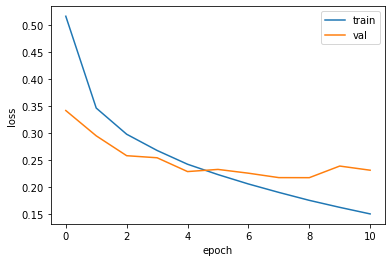

In [76]:
# 손실 그래프 그리기

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [77]:
# 모델 평가

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2176 - accuracy: 0.9229


[0.2175937294960022, 0.9229166507720947]

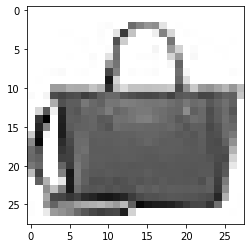

In [78]:
# 이미지 예측 - 이미지 나타내기

plt.imshow(val_scaled[0].reshape(28,28), cmap="gray_r")
plt.show()

In [79]:
# 이미지 예측

preds = model.predict(val_scaled[0:1])
print(preds)

[[3.5385853e-19 3.1534778e-23 3.0930416e-21 1.0978160e-15 6.0490074e-19
  7.2270249e-18 1.0958561e-18 6.4014489e-17 1.0000000e+00 1.4304338e-17]]


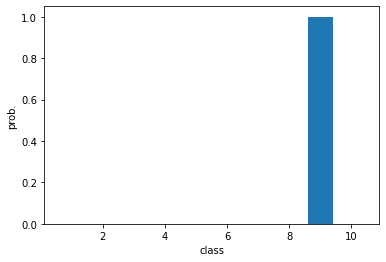

In [80]:
# 예측 결과 그래프로 나타내기

plt.bar(range(1,11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [81]:
# 데이터셋의 레이블

classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클 부츠"]

In [82]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [83]:
# test set 측정

test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [84]:
# test set 성능

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2436 - accuracy: 0.9156


[0.24358618259429932, 0.9156000018119812]